# Import required libraries

In [16]:
# For numerical computations
import numpy as np
import pandas as pd

In [17]:
# For plotting graphs
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] ="0"
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

In [19]:
# Other required libraries
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report

# Data Preprocessing

In [22]:
training_datagen = ImageDataGenerator(
    rescale=1./255, # feature scaling to each pixel (val / 255)
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

training_set = training_datagen.flow_from_directory(
    './Dataset/train/', # directory / path to the training dataset
    target_size=(32, 32), # final size of the image which will be fit to the Neural Network
    batch_size=32, # no. of images in each batch
    class_mode='categorical' # binary or categorical
)

Found 9890 images belonging to 3 classes.


# Preprocessing the test dataset

In [21]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_set = test_datagen.flow_from_directory(
    './Dataset/test/', # directory / path to the training dataset
    target_size=(32, 32), # final size of the image which will be fit to the Neural Network
    batch_size=32, # no. of images in each batch
    class_mode='categorical' # binary or categorical
)

Found 5033 images belonging to 3 classes.


# Build the CNN model

In [23]:
cnn = tf.keras.models.Sequential()

In [24]:
# Add convolutional layer
cnn.add(
    tf.keras.layers.Conv2D(
        filters=32, #no. of feature detectors
        kernel_size=3, # size of the feature detector
        input_shape=[32,32, 3], # 3 -> rgb
        activation='relu'
    )
)

In [25]:
# Add a pooling layer
cnn.add(
    tf.keras.layers.MaxPool2D(
        pool_size=(2, 2),
        strides=2
    )
)

In [26]:
# Add flattening layer
cnn.add(
    tf.keras.layers.Flatten()
)

In [27]:
# Add a fully connected layer
cnn.add(
    tf.keras.layers.Dense(
        units=32,
        activation='relu'
    )
)

In [28]:
# Output layer
cnn.add(
    tf.keras.layers.Dense(
        units=3,
        activation='sigmoid'
    )
)

In [29]:
# Training the model
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [30]:
cnn.fit(
    x=training_set,
    y=None,
    batch_size=None,
    epochs=10,
    verbose='auto',
    callbacks=None,
    validation_split=0.0,
    validation_data=test_set,
    shuffle=True,
    class_weight=None,
    sample_weight=None,
    initial_epoch=0,
    steps_per_epoch=None,
    validation_steps=None,
    validation_batch_size=None,
    validation_freq=1,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False,
)

Epoch 1/10
310/310 [==============================] - 286s 920ms/step - loss: 1.0174 - accuracy: 0.4782 - val_loss: 0.8766 - val_accuracy: 0.5647
Epoch 2/10
310/310 [==============================] - 284s 918ms/step - loss: 0.9009 - accuracy: 0.5156 - val_loss: 0.9585 - val_accuracy: 0.4878
Epoch 3/10
310/310 [==============================] - 288s 931ms/step - loss: 0.8751 - accuracy: 0.5385 - val_loss: 0.8760 - val_accuracy: 0.5909
Epoch 4/10
310/310 [==============================] - 282s 912ms/step - loss: 0.8582 - accuracy: 0.5511 - val_loss: 0.9112 - val_accuracy: 0.5347
Epoch 5/10
310/310 [==============================] - 277s 895ms/step - loss: 0.8467 - accuracy: 0.5513 - val_loss: 0.8890 - val_accuracy: 0.5581
Epoch 6/10
310/310 [==============================] - 283s 913ms/step - loss: 0.8364 - accuracy: 0.5592 - val_loss: 0.8581 - val_accuracy: 0.5456
Epoch 7/10
310/310 [==============================] - 287s 928ms/step - loss: 0.8327 - accuracy: 0.5712 - val_loss: 0.8591 -

In [31]:
loss_df = pd.DataFrame(cnn.history.history)

In [16]:
pd1 = loss_df[['loss', 'accuracy']]
pd2 = loss_df[['val_loss', 'val_accuracy']]

<Axes: >

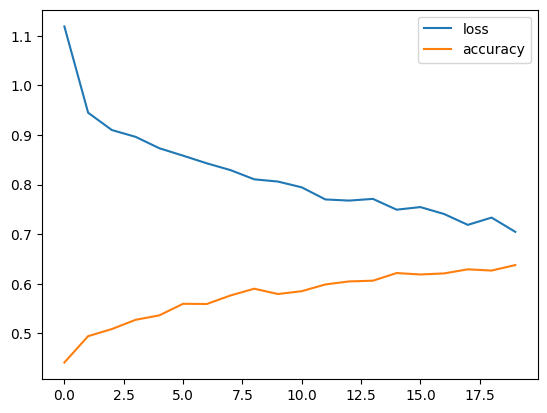

In [17]:
pd1.plot()

In [15]:
# pd2.plot() #validation loss

# Model evaluation

In [32]:
from tensorflow.keras.utils import load_img, img_to_array

In [34]:

test_image = load_img('./Dataset/test/lsb/2552.png', target_size=(64, 64))

# convert the image into an array
test_image = img_to_array(test_image) # image should be in a batch
test_image = np.expand_dims(test_image, axis=0)

In [35]:
result = cnn.predict(test_image/255.0)
print(training_set.class_indices)
print(result)

# if result[0][0] > 0.5:
#     print("Prediction: Cover")
# else:
#     print("Prediction: Stego")

1/1 [==============================] - 0s 106ms/step
{'cover': 0, 'lsb': 1, 'stego': 2}
[[0.3286602 0.8073955 0.311584 ]]


In [36]:
cnn.save('model.h5')

In [43]:
def predict(path):
    class_dict = {0: "Cover", 1 : "LSB", 2 : "Steganoraphic"}
    test_image = load_img(path, target_size=(64, 64))

    # convert the image into an array
    test_image = img_to_array(test_image) # image should be in a batch
    test_image = np.expand_dims(test_image, axis=0)
    result = cnn.predict(test_image/255.0)
    print(class_dict[np.argmax(result)])

In [44]:
predict('./Dataset/extra_stego/048902.jpg')

1/1 [==============================] - 0s 19ms/step
Steganoraphic
